# Breast Cancer Classifier

In [2]:
# importing dependencies and dataset
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [10]:
# importing dataset
data = datasets.load_breast_cancer()
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [5]:
# spliting into train and test, and passing a random_state, cause I want my split to be same every time I run the program , so its easy to compare
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=0)

In [11]:
# Fitting classfier with training data
clf = KNeighborsClassifier()
clf.fit(X_train ,Y_train)

KNeighborsClassifier()

In [12]:
# Checking prediction score on testing data with default k_neighbours value
clf.score(X_test, Y_test)

0.9385964912280702

In [20]:
# Checking for best k_neighbour value for which prediction score is best
# To check this we will use cross_val_score() which will split training data into different parts and then will calculate score for us
# we can just iterate over i in a range to get best k value
x_axis = []
y_axis = []
for i in range(1, 26, 2):
    clf = KNeighborsClassifier(n_neighbors=i)
    score  = cross_val_score(clf, X_train, Y_train)
    x_axis.append(i)
    y_axis.append(score.mean())
    print(i, score.mean())

1 0.9208791208791209
3 0.9318681318681319
5 0.9208791208791209
7 0.9274725274725275
9 0.9362637362637363
11 0.9318681318681319
13 0.9362637362637363
15 0.9230769230769231
17 0.9230769230769231
19 0.9208791208791209
21 0.9186813186813186
23 0.9142857142857143
25 0.9142857142857143


In [21]:
import matplotlib.pyplot as plt

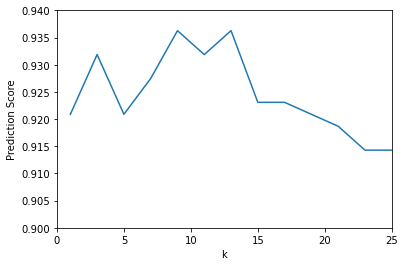

In [22]:
# plotting Prediction vs k , to get more clear about choosing k value
plt.plot(x_axis, y_axis)
plt.axis([0,25,0.9,0.94])
plt.xlabel('k')
plt.ylabel('Prediction Score')
plt.show()

In [26]:
# passing n_neighbours as 9, which we got by using cross validation and checking best prediction score

clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(X_train, Y_train)

print('Prediction Score of testing data after using n_neighbours as 9 : ', clf.score(X_test, Y_test)*100,'%')

Prediction Score of testing data after using n_neighbours as 9 :  96.49122807017544 %


## Self Implementation of KNN

In [29]:
from sklearn.metrics import accuracy_score
from collections import Counter

In [40]:
# Example of using Counter
a = [1,0,1,1,1,1,0,2]
print(Counter(a).most_common())
print(Counter(a).most_common(2))
print(Counter(a).most_common(1))
print(type(Counter(a).most_common(1)[0]))
print(Counter(a).most_common(1)[0][0])

[(1, 5), (0, 2), (2, 1)]
[(1, 5), (0, 2)]
[(1, 5)]
<class 'tuple'>
1


In [45]:
# In KNN all the work is done while calculating Test run, therefore train function just returns
def train(x, y):
    return

def predict_one(x_train, y_train, x_test, k):
    distances = []
    for i in range(len(x_train)):
#         Using Euclidian's Distance
        distance = ((x_train[i, :] - x_test)**2).sum()
        distances.append([distance, i])
    distances = sorted(distances)
    targets = []
    for i in range(k):
        index_of_train_data = distances[i][1]
        targets.append(y_train[index_of_train_data])
        
    return Counter(targets).most_common(1)[0][0]

def predict(x_train, y_train, x_test_data, k):
    predictions = []
    for x_test in x_test_data:
        predictions.append(predict_one(x_train, y_train,x_test,k))
    return predictions

In [44]:
y_pred = predict(X_train, Y_train, X_test, 9)
accuracy_score(Y_test, y_pred)

0.9649122807017544

In [47]:
print('Prediction Score of testing data after using n_neighbours as 9 : ', accuracy_score(Y_test, y_pred)*100,'%')

Prediction Score of testing data after using n_neighbours as 9 :  96.49122807017544 %


## While self-implementing got the same prediction score as I got while using sklearn KNN classifier, since the approach is similar, and n_neighbours values is kept same